<a href="https://colab.research.google.com/github/Scurrra/WaveletNN-PyTorch/blob/master/notebooks/waveletnn_pywt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WaveletNN with [PyWavelets](https://pywavelets.readthedocs.io/)

## Install `waveletnn` with `pywt` feature

In [36]:
!pip install -qq waveletnn[pywt]

In [4]:
import torch
from waveletnn import *

In [5]:
OrthonormalWaveletBlock1D

waveletnn.orthonormal.OrthonormalWaveletBlock1D

## 1D transform

The example shows single- and multi-channel orthonormal transform with wavelet "db5" from `pywt`.

In [6]:
owb = OrthonormalWaveletBlock1D(kernel_size=10, wavelet="db5")
owb

OrthonormalWaveletBlock1D(
  (pad): PadSequence()
)

In [7]:
owb_inv = InverseWaveletBlock1D(kernel_size=10, wavelet="db5")
owb_inv

InverseWaveletBlock1D(
  (pad): PadSequence()
)

### Single-channel

In [8]:
a = torch.arange(200).reshape(5,1,-1) / 1
a, a.shape

(tensor([[[  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
            11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
            22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
            33.,  34.,  35.,  36.,  37.,  38.,  39.]],
 
         [[ 40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,
            51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,
            62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,
            73.,  74.,  75.,  76.,  77.,  78.,  79.]],
 
         [[ 80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,
            91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101.,
           102., 103., 104., 105., 106., 107., 108., 109., 110., 111., 112.,
           113., 114., 115., 116., 117., 118., 119.]],
 
         [[120., 121., 122., 123., 124., 125., 126., 127., 128., 129., 130.,
           131., 132., 133., 134., 135., 136., 137., 138., 

In [9]:
s, d = owb(a)
s[0].shape, d[0].shape

(torch.Size([5, 1, 20]), torch.Size([5, 1, 20]))

In [10]:
a_rec = owb_inv(s, d)
a_rec, a_rec.shape

(tensor([[[-3.7765e-07,  1.0000e+00,  2.0000e+00,  3.0000e+00,  4.0000e+00,
            5.0000e+00,  6.0000e+00,  7.0000e+00,  8.0000e+00,  9.0000e+00,
            1.0000e+01,  1.1000e+01,  1.2000e+01,  1.3000e+01,  1.4000e+01,
            1.5000e+01,  1.6000e+01,  1.7000e+01,  1.8000e+01,  1.9000e+01,
            2.0000e+01,  2.1000e+01,  2.2000e+01,  2.3000e+01,  2.4000e+01,
            2.5000e+01,  2.6000e+01,  2.7000e+01,  2.8000e+01,  2.9000e+01,
            3.0000e+01,  3.1000e+01,  3.2000e+01,  3.3000e+01,  3.4000e+01,
            3.5000e+01,  3.6000e+01,  3.7000e+01,  3.8000e+01,  3.9000e+01]],
 
         [[ 4.0000e+01,  4.1000e+01,  4.2000e+01,  4.3000e+01,  4.4000e+01,
            4.5000e+01,  4.6000e+01,  4.7000e+01,  4.8000e+01,  4.9000e+01,
            5.0000e+01,  5.1000e+01,  5.2000e+01,  5.3000e+01,  5.4000e+01,
            5.5000e+01,  5.6000e+01,  5.7000e+01,  5.8000e+01,  5.9000e+01,
            6.0000e+01,  6.1000e+01,  6.2000e+01,  6.3000e+01,  6.4000e+01,
        

In [11]:
((a-a_rec)**2).sum()

tensor(1.3753e-08, grad_fn=<SumBackward0>)

### Multi-channel

In [12]:
a = torch.arange(200).reshape(5,4,-1) / 1
a, a.shape

(tensor([[[  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
          [ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.],
          [ 20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.],
          [ 30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.]],
 
         [[ 40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.],
          [ 50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.],
          [ 60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.],
          [ 70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.]],
 
         [[ 80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.],
          [ 90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.],
          [100., 101., 102., 103., 104., 105., 106., 107., 108., 109.],
          [110., 111., 112., 113., 114., 115., 116., 117., 118., 119.]],
 
         [[120., 121., 122., 123., 124., 125., 126., 127., 128., 129.],
          [130., 131., 132., 133., 134., 135., 136., 13

In [13]:
s, d = owb(a)
s[0].shape, d[0].shape

(torch.Size([5, 4, 5]), torch.Size([5, 4, 5]))

In [14]:
a_rec = owb_inv(*owb(a))
a_rec, a_rec.shape

(tensor([[[-3.7765e-07,  1.0000e+00,  2.0000e+00,  3.0000e+00,  4.0000e+00,
            5.0000e+00,  6.0000e+00,  7.0000e+00,  8.0000e+00,  9.0000e+00],
          [ 1.0000e+01,  1.1000e+01,  1.2000e+01,  1.3000e+01,  1.4000e+01,
            1.5000e+01,  1.6000e+01,  1.7000e+01,  1.8000e+01,  1.9000e+01],
          [ 2.0000e+01,  2.1000e+01,  2.2000e+01,  2.3000e+01,  2.4000e+01,
            2.5000e+01,  2.6000e+01,  2.7000e+01,  2.8000e+01,  2.9000e+01],
          [ 3.0000e+01,  3.1000e+01,  3.2000e+01,  3.3000e+01,  3.4000e+01,
            3.5000e+01,  3.6000e+01,  3.7000e+01,  3.8000e+01,  3.9000e+01]],
 
         [[ 4.0000e+01,  4.1000e+01,  4.2000e+01,  4.3000e+01,  4.4000e+01,
            4.5000e+01,  4.6000e+01,  4.7000e+01,  4.8000e+01,  4.9000e+01],
          [ 5.0000e+01,  5.1000e+01,  5.2000e+01,  5.3000e+01,  5.4000e+01,
            5.5000e+01,  5.6000e+01,  5.7000e+01,  5.8000e+01,  5.9000e+01],
          [ 6.0000e+01,  6.1000e+01,  6.2000e+01,  6.3000e+01,  6.4000e+01,
   

In [15]:
((a-a_rec)**2).sum()

tensor(1.9508e-08, grad_fn=<SumBackward0>)

## Inverse transform with dynamic kerel

Inverse transform blocks are not trainable, but they fully depend on analysis blocks, so they have to have ability to pass data forward during training with dynamically changing flters. These can be achived with "static_filters" flag off and passing filters directly to forward function. The behavior can be shown on `pywt` wavelets too by passing wavelet name.

In [16]:
owb_inv10 = InverseWaveletBlock1D(kernel_size=10, static_filters=False)
owb_inv10

InverseWaveletBlock1D(
  (pad): PadSequence()
)

In [17]:
owb_inv10(*owb(a), wavelet="db5")

tensor([[[-3.7765e-07,  1.0000e+00,  2.0000e+00,  3.0000e+00,  4.0000e+00,
           5.0000e+00,  6.0000e+00,  7.0000e+00,  8.0000e+00,  9.0000e+00],
         [ 1.0000e+01,  1.1000e+01,  1.2000e+01,  1.3000e+01,  1.4000e+01,
           1.5000e+01,  1.6000e+01,  1.7000e+01,  1.8000e+01,  1.9000e+01],
         [ 2.0000e+01,  2.1000e+01,  2.2000e+01,  2.3000e+01,  2.4000e+01,
           2.5000e+01,  2.6000e+01,  2.7000e+01,  2.8000e+01,  2.9000e+01],
         [ 3.0000e+01,  3.1000e+01,  3.2000e+01,  3.3000e+01,  3.4000e+01,
           3.5000e+01,  3.6000e+01,  3.7000e+01,  3.8000e+01,  3.9000e+01]],

        [[ 4.0000e+01,  4.1000e+01,  4.2000e+01,  4.3000e+01,  4.4000e+01,
           4.5000e+01,  4.6000e+01,  4.7000e+01,  4.8000e+01,  4.9000e+01],
         [ 5.0000e+01,  5.1000e+01,  5.2000e+01,  5.3000e+01,  5.4000e+01,
           5.5000e+01,  5.6000e+01,  5.7000e+01,  5.8000e+01,  5.9000e+01],
         [ 6.0000e+01,  6.1000e+01,  6.2000e+01,  6.3000e+01,  6.4000e+01,
           6.5000

## 2D transform

The example shows single-channel (on orca) and multichannel (on lenna) transform with wavelet "bior2.4" and "circular" extension mode, the default one in wavelet's literature. We also set "normalize_approximation" flag on to scale the approximation component in its original span.

In [18]:
bwb = BiorthogonalWaveletBlock2D(kernel_size=10, wavelet="bior2.4", padding_mode="circular", normalize_approximation=True)
bwb

BiorthogonalWaveletBlock2D(
  (pad): PadSequence()
)

In [19]:
bwb_inv = InverseWaveletBlock2D(kernel_size=bwb.kernel_size, levels=1, wavelet="bior2.4", padding_mode="circular", normalize_approximation=True)
bwb_inv

InverseWaveletBlock2D(
  (pad): PadSequence()
)

In [20]:
from torchvision.io import decode_image

import matplotlib.pyplot as plt

In [21]:
!gdown -q 1CTtEFMHngtkIFeCTxJJBFwDP8qk93iG0
!wget -q https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png

### Single-channel image

torch.Size([1, 1, 1024, 1024])


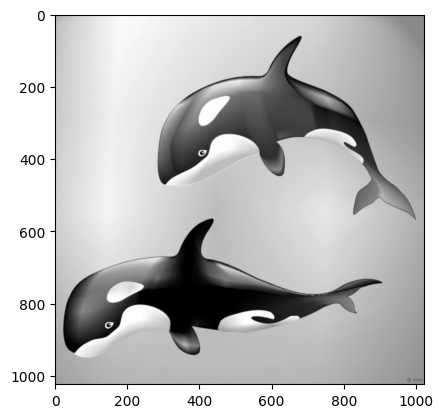

In [22]:
orca = decode_image("orca.png") / 1
orca = orca.unsqueeze(0)

print(orca.shape)
plt.imshow(orca.squeeze(0).squeeze(0), cmap='gray')

torch.Size([1, 1, 512, 512])


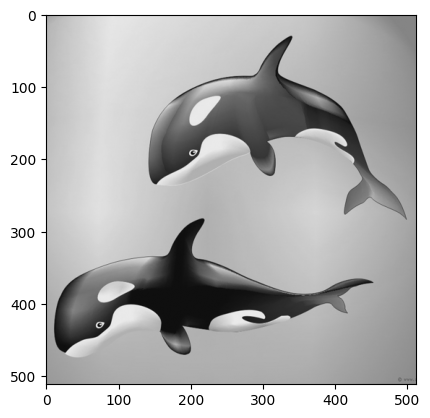

In [23]:
# one-level analysis
ss, sd, ds, dd = bwb(orca)
ss, sd, ds, dd = ss[0].detach(), sd[0].detach(), ds[0].detach(), dd[0].detach()

print(ss.shape)
plt.imshow(ss.squeeze(0).squeeze(0), cmap='gray')

torch.Size([1, 1, 1024, 1024])


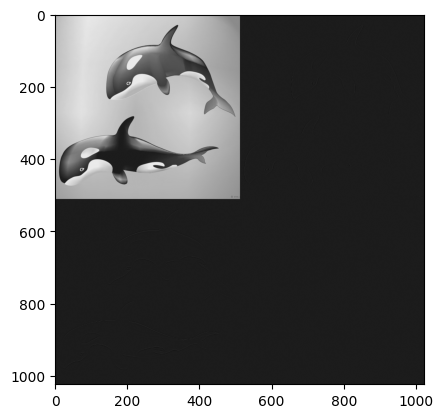

In [24]:
waveletogram = torch.cat(
    (torch.cat(
        (ss, sd), dim=2
    ), torch.cat(
        (ds, dd), dim=2
    )), dim=3
)

print(waveletogram.shape)
plt.imshow(waveletogram.squeeze(0).squeeze(0), cmap='gray')

torch.Size([1, 1, 1024, 1024])


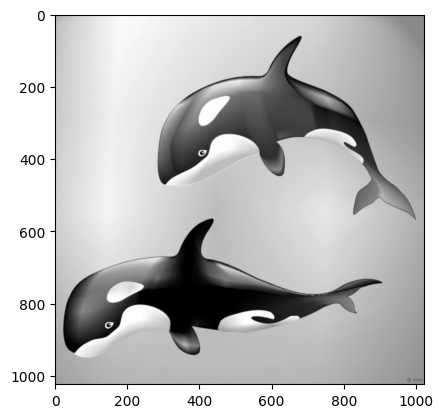

In [25]:
# synthesis
orca_rec = bwb_inv(ss, [sd], [ds], [dd])

print(orca_rec.shape)
plt.imshow(orca_rec.detach().squeeze(0).squeeze(0), cmap='gray')

In [26]:
orca.min(), orca.max()

(tensor(0.), tensor(255.))

In [27]:
orca_rec.min(), orca_rec.max()

(tensor(-1.1325e-06), tensor(255.0000))

In [28]:
((orca - orca_rec) ** 2).sum()

tensor(0.0015)

### Multi-channel image

torch.Size([1, 3, 512, 512])


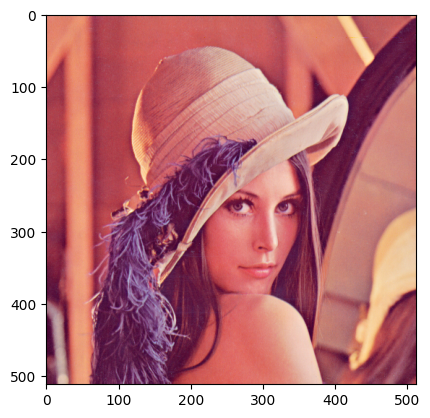

In [29]:
lenna = decode_image("Lenna_(test_image).png").unsqueeze(0) / 255

print(lenna.shape)
plt.imshow(lenna.squeeze(0).permute(1,2,0))

torch.Size([1, 3, 256, 256])


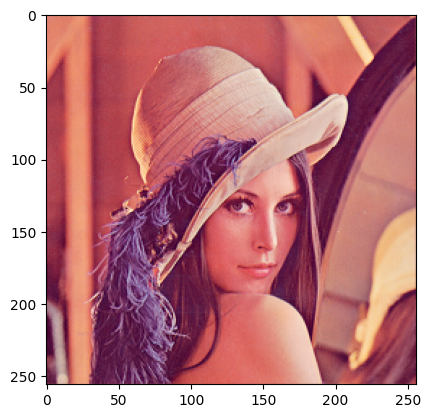

In [30]:
# analysis
ss, sd, ds, dd = bwb(lenna)
ss, sd, ds, dd = ss[0].detach(), sd[0].detach(), ds[0].detach(), dd[0].detach()

print(ss.shape)
plt.imshow(ss.squeeze(0).permute(1,2,0))

torch.Size([1, 3, 512, 512])


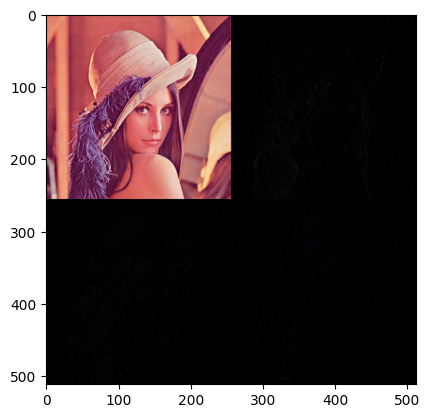

In [31]:
waveletogram = torch.cat(
    (torch.cat(
        (ss, sd), dim=2
    ), torch.cat(
        (ds, dd), dim=2
    )), dim=3
)

print(waveletogram.shape)
plt.imshow(waveletogram.squeeze(0).permute(1,2,0))

torch.Size([1, 3, 512, 512])


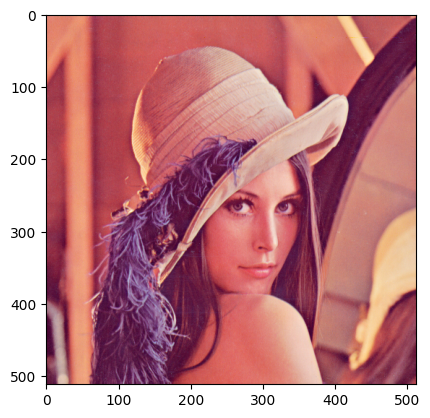

In [32]:
#synthesis
lenna_rec = bwb_inv(ss, [sd], [ds], [dd])

print(lenna_rec.shape)
plt.imshow(lenna_rec.squeeze(0).permute(1,2,0))

In [33]:
lenna.min(), lenna.max()

(tensor(0.0118), tensor(1.))

In [34]:
lenna_rec.min(), lenna_rec.max()

(tensor(0.0118), tensor(1.0000))

In [35]:
((lenna - lenna_rec) ** 2).sum()

tensor(1.0105e-08)